Shivangi Kochrekar
<br> A 23

##Experiment 2

**Objective**: To implement and use Principal Component Analysis using Python Platform 

General Steps:

1. Load the dataset (Use pandas)

2. Data Preprocessing (Handling NA values)

3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib (What variables to include, sample size)

4. Apply Normalization and Generate Covariance Matrix

5. Apply PCA

6. Build the model, summarize it and evaluate the model and Summarize

7. Tuning the model

##PCA

There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

1) Feature Elimination
<br>2) Feature Extraction

Mathematically the main objective of PCA is to:

1. Find an orthonormal basis for the data.

2. Sort dimensions in the order of importance.

3. Discard the low significance dimensions.

4. Focus on uncorrelated and Gaussian components.

When X1 and X2 are dependent on each other, then these variables end up interacting with each other. In other words, there is a correlation present amongst them. When two independent variables are very strongly interacting with each other, that is the correlation coefficient is close to 1 then we are providing the same information to the algorithm in two dimensions, which is nothing but redundancy. This unnecessarily increases the dimensionality of the features of the mathematical space. When we have too many dimensions more than required then we are exposing ourselves to the Curse of Dimensionality.

In [141]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score

###1. Load the dataset (Using pandas)

In [142]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
data = pd.read_csv('drive/MyDrive/Datasets/Wine_Quality/winequality-red.csv', na_values = "?", comment = "\t", skipinitialspace = True) 

data

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [144]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###2. Data Preprocessing

###3.Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation between different fearures')

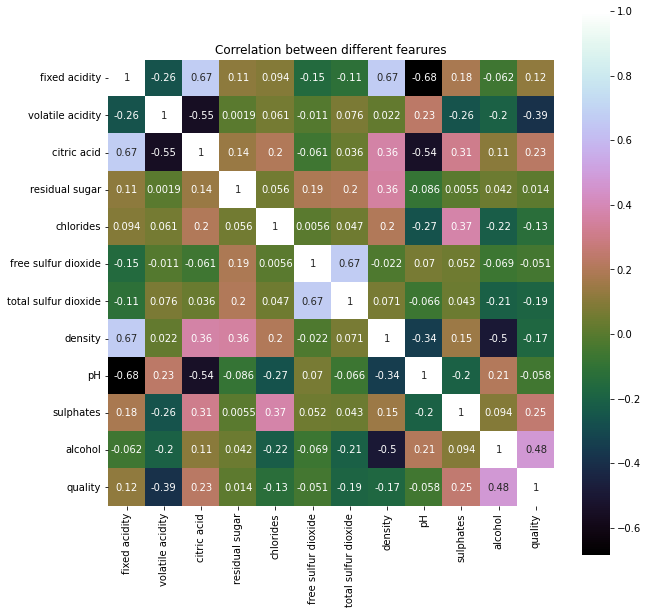

In [145]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [146]:
X = data.drop(columns=['quality'])
y = data['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [147]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

###4.Apply Normalization and Generate Covariance Matrix

In [148]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [149]:
##Covariance Matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046 -0.06101629
   0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202]
 [ 0.11484855  0.00191908  0.14366701  1.00062578  0.05564433  0.18716605
   0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177]
 [ 0.09376383  0.06133613  0.20395046  0.05564433  1.00062578  0.00556563
   0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893]
 [-0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563  1.00062578
   0.66808426 -0.02195956  0.07042154  0.0516899  -0.06945179]
 [-0.11325227  0.07651786  0.03555526  0.20315493  0.04743013  0.66808426
   1.00062578  0.07131408 -0.06653617  0.04297371 -0.20578264]
 [ 0.66846534  0.022040

In [150]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046 -0.06101629
   0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202]
 [ 0.11484855  0.00191908  0.14366701  1.00062578  0.05564433  0.18716605
   0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177]
 [ 0.09376383  0.06133613  0.20395046  0.05564433  1.00062578  0.00556563
   0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893]
 [-0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563  1.00062578
   0.66808426 -0.02195956  0.07042154  0.0516899  -0.06945179]
 [-0.11325227  0.07651786  0.03555526  0.20315493  0.04743013  0.66808426
   1.00062578  0.07131408 -0.06653617  0.04297371 -0.20578264]
 [ 0.66846534  0

Text(0.5, 1.0, 'Correlation between different features')

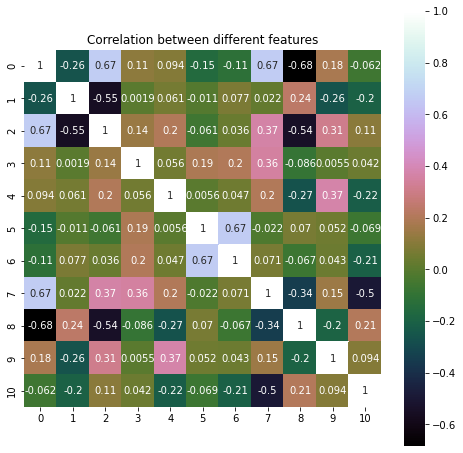

In [151]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [152]:
#eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366 -0.63969145
  -0.24952314  0.19402091 -0.17759545 -0.35022736  0.10147858]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452 -0.0023886
   0.36592473 -0.1291103  -0.07877531 -0.5337351   0.41144893]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.0709103
   0.62167708 -0.38144967 -0.37751558  0.10549701  0.06959338]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429 -0.18402996
   0.09287208  0.00752295  0.29984469  0.29066341  0.04915555]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009  -0.05306532
  -0.21767112  0.11133867 -0.35700936  0.37041337  0.30433857]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198  0.05142086
   0.24848326  0.63540522 -0.2047805  -0.11659611 -0.01400021]
 [ 0.02357485  0.56948696  0.3224145  -0.03457712 -0.22246456 -0.0687016
  -0.37075027 -0.59211589  0.01903597 -0.09366237  0.13630755]
 [ 0.39535301  0.23357549 -0.3

###5. Apply PCA

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.


In [153]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.1010718226728247
1.9271148896585164
1.5515137913334192
1.2139917499341288
0.9598923792754835
0.6600210359988652
0.5841565453623765
0.4232213784437501
0.34485778773040743
0.1814466416408515
0.059595582455007255


In [154]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

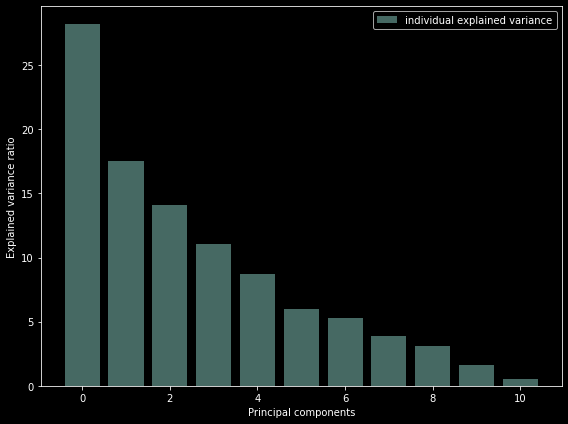

In [155]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(11), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()



The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored since they both contribute almost 17% of the data.But we can drop the end components as it has less than 10% of the variance


In [156]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1), 
                      eig_pairs[1][1].reshape(11,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.48931422 -0.11050274]
 [-0.23858436  0.27493048]
 [ 0.46363166 -0.15179136]
 [ 0.14610715  0.27208024]
 [ 0.21224658  0.14805156]
 [-0.03615752  0.51356681]
 [ 0.02357485  0.56948696]
 [ 0.39535301  0.23357549]
 [-0.43851962  0.00671079]
 [ 0.24292133 -0.03755392]
 [-0.11323206 -0.38618096]]


In [157]:
Y = X_std.dot(matrix_w)
Y

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

Text(0, 0.5, 'Cumulative explained variance')

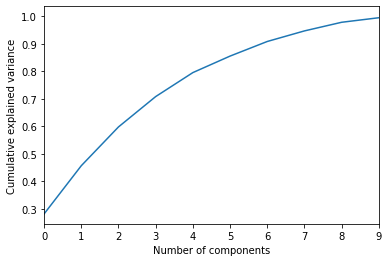

In [158]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,9,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [159]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn)

[[-1.61952988  0.45095009]
 [-0.79916993  1.85655306]
 [-0.74847909  0.88203886]
 ...
 [-1.45612897  0.31174559]
 [-2.27051793  0.97979111]
 [-0.42697475 -0.53669021]]


In [160]:
Y.shape

(1599, 2)

In [161]:
Y_sklearn.shape

(1599, 2)

In [162]:
X_std.shape

(1599, 11)

In [163]:
y.shape

(1599,)

###6. Build Model and Evaluate Model

In [187]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(Y_sklearn, y, test_size=0.20, random_state=2)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X, y, test_size=0.20, random_state=2)

In [188]:
print(X_test.shape)
print(y_test.shape)

(320, 2)
(320,)


In [189]:
# Building Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [190]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [191]:
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train) 
regressor.score(X_test,y_test) 

0.1434117572980771

In [192]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),5))

Root Mean Squared Error (RMSE):  0.71988


In [193]:
regressor_score = regressor.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(regressor_score, 5))

Score of Linear Regression Model:  0.14341


In [194]:
# plt.scatter(X_test[0],y_test,color='b')
# plt.plot(X_test[0],y_pred, color='k')

# plt.show()

In [195]:
regressor.fit(X_train_normal, y_train_normal)
regressor.score(X_train_normal,y_train_normal) 

0.37079770098666653

##Conclusion: 
I implemented dimensionaity reduction technique Principal Component Analysis (PCA). I understood why PCA is required and how to form principal components and thus implemented it. 


